# Checkpoint 1

**Due: Tuesday, 19 October, 2021 at 11:00am BST**

Total points: 100

### Read This First
1. Use the constants provided in the cells. Do not use your own constants.

2. Wherever you see `raise NotImplementedError()`, remove that line and put your code there.

3. Put the code that produces the output for a given task in the cell indicated. You are welcome to add as many cells as you like for imports, function definitions, variables, etc.

4. Your notebook must run correctly when executed once from start to finish. Your notebook will be graded based on how it runs, not how it looks when you submit it. To test this, go to the *Kernel* menu and select *Restart & Run All*.

5. Once you are happy with it, clear the output by selecting *Restart & Clear Output* from the *Kernel* menu.

6. Submit through Noteable.

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import time

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14

# Problem 1 - 20 points

## Interpolation
You are given an array of x and y measurements that you need to interpolate on new locations.

The file data.txt is a text file that contains two arrays of Xs and Ys in two rows that need to be interpolated. The file test.txt is a text file that contains an array of X values on which you need to evaluate the interpolated function.

You will need to do the interpolation by chosing the best interpolation technique among linear interpolation, cubic splines and smoothing splines with different values of smoothing parameters.

You need to write the code that

selects the best among different interpolation methods for a provided dataset
returns array of the results of evaluating the best interpolation method on test dataset
The resulting array will be then checked to provide the mean square error with respect to true values of  ∑𝑖1𝑁(𝑦𝑖𝑛𝑡𝑒𝑟𝑝,𝑖−𝑦𝑡𝑟𝑢𝑒,𝑖)2<0.1  on the test dataset.

In [3]:
import scipy.interpolate

In [4]:
### PREPARING THE DATA SET

In [5]:
data = np.loadtxt('data.txt')
xtest = np.loadtxt('test.txt')

In [6]:
xdata,ydata = data[0],data[1]

In [7]:
zipped = zip(xdata,ydata)

In [8]:
#sort data with respect to increasing x, with x still coupled to its respective y values
data_sort = sorted(zipped, key=lambda x: x[0])

In [9]:
from sklearn.model_selection import train_test_split
import sklearn

In [10]:
### CHOOSING THE BEST INTERPOLATION

In [11]:
def solve_task1(data_sort,xtest):
    #create test 30% and training 70%
    train,test = train_test_split(data_sort, train_size=0.7) 
    
    xTRAIN,yTRAIN = zip(*train)
    xTEST,yTEST = zip(*test)
    
    #interpolate
    #linear interpolation
    Int_1d = scipy.interpolate.interp1d(xTRAIN, yTRAIN, fill_value='extrapolate', axis=0, kind='linear', assume_sorted=False)
    mse_1d = np.sum((Int_1d(xTEST) - yTEST)**2)/len(xTEST)
    
    #sorting the data set with respect to x so that x is increasing for interpolation (train_test_split reshuffles data)
    Train1 = zip(xTRAIN,yTRAIN)
    Zipped1 = sorted(Train1, key=lambda x: x[0])
    xTRAIN1,yTRAIN1 = zip(*Zipped1)
    
    #smoothing spline s=0.2
    Int_smooth2 = scipy.interpolate.UnivariateSpline(xTRAIN1, yTRAIN1, s=0.2)
    mse_smooth2 = np.mean((Int_smooth2(xTEST) - yTEST)**2)
    #smoothing spline s=0.7
    Int_smooth7 = scipy.interpolate.UnivariateSpline(xTRAIN1, yTRAIN1, s=0.7)
    mse_smooth7 = np.mean((Int_smooth7(xTEST) - yTEST)**2)
    #smoothing spline s=1
    Int_smooth1 = scipy.interpolate.UnivariateSpline(xTRAIN1, yTRAIN1, s=1)
    mse_smooth1 = np.mean((Int_smooth1(xTEST) - yTEST)**2)
    
    #cubic spline
    Int_cubic = scipy.interpolate.CubicSpline(xTRAIN1, yTRAIN1)
    mse_cubic = np.mean((Int_cubic(xTEST) - yTEST)**2)
    
    #choose method with smallest mean squared error
    Int = [Int_1d,Int_smooth2,Int_smooth7,Int_smooth1,Int_cubic]
    MSE = [mse_1d,mse_smooth2,mse_smooth7,mse_smooth1,mse_cubic]
    best_Int = Int[MSE.index(min(MSE))]
    y_predict = best_Int(xtest)
    
    return y_predict

In [12]:
y_interp = solve_task1(data_sort,xtest)
y_interp

array([230.65049963, 149.12649411, 275.63846194, 151.93071063,
       319.27944572, 161.56691684, 253.84536063, 218.87190957,
       176.94854369, 203.06346117, 124.4458001 , 197.14449856,
       242.79753139, 308.73920642, 296.49331218,  45.85459119,
       203.00118172, 147.83107547, 323.31597366, 161.88275542,
       187.09760111, 309.28017258, 250.45590503, 222.19500465,
       185.88760518, 207.78217193, 185.47271261, 294.30029767,
        61.99332665,  81.7643106 , 197.35203596, 192.10564608,
       266.70415273, 168.91068889,  28.87942408, 289.11463833,
       157.14662334,  34.54353143, 275.44239873, 126.76680295,
        29.2785152 , 103.82906461, 149.55178506, 196.42350708,
       320.7918562 , 168.74116507, 169.85064352, 311.78910643,
       147.56544203])

We will add tests to the cell below when grading.

In [13]:
# This function will be tested with this 
# assert ( np.mean((solve_task1()- YTRUE )**2) < 0.1)

print ("Testing, testing...")


Testing, testing...


# Problem 2 - 80 points

This problem is divided into 5 tasks, worth the following number of points:

1. 20 points
2. 15 points
3. 15 points
4. 20 points
5. 10 points

## The 1D Time-independent Schrödinger equation

In one dimension, the time-independent Schrödinger equation is given by

$
\large
\begin{align}
\mathbf{H}\ \mathbf{\Psi} = E\ \mathbf{\Psi}
\end{align}
$,

where $\mathbf{H}$ is the Hamiltonian. Here, $E$ and $\mathbf{\Psi}$ are the eigenvectors and eigenvalues of $\mathbf{H}$, respectively. The Hamiltonian is expressed as

$
\Large
\begin{align}
H = -\frac{\hbar^2}{2m} \nabla^2 + V(r),
\end{align}
$

where $V(r)$ is the electric potential energy, given by

$
\Large
\begin{align}
V(r) = -\frac{e^{2}}{4 \pi \epsilon_{0} r}.
\end{align}
$

In matrix form, the Schrödinger equation is solved for N equally spaced values of r, such that r goes from ($r_{max}$/N) to $r_{max}$, where $r_{max} \sim 1.5$ nm is a sensible choice. To turn the Schrödinger equation into a matrix, $\textbf{V(r)}$ should be a diagonal matrix with the values of the potential at each r along the diagonal.

For this problem, the constants for the above equations have been defined for you in the cell below. Please use these for your calculations.
* $\frac{\hbar^{2}}{2m} = 0.0380998\ nm^{2} eV$ (called `c1` below)
* $\frac{e^{2}}{4 \pi \epsilon_{0}} = 1.43996\ nm\ eV$ (called `c2` below)
* $r_{0} = 0.0529177\ nm$ (the Bhor radius, called `r0` below)
* Planck constant $h = 6.62606896\times10^{-34} J s$ (`h`)
* Speed of light $c = 299792458\ m/s$ (`c`)

In [14]:
# Constants (use these)
c1 = 0.0380998 # nm^2 eV
c2 = 1.43996 # nm eV
r0 = 0.0529177 # nm
h  = 6.62606896e-34 # J s
c  = 299792458. # m/s
hc = 1239.8419 # eV nm

# Task 1 - 20 points

For this task, you will create the matrix representing $\mathbf{H}$ and find the two lowest eigenvalues. These correspond to the two lowest energy levels of the Hydrogen atom.

In the constants defined above, the theoretical values for the first two energy levels are given by

$
\Large
\begin{align}
e_{n} = \frac{c_2}{2 r_0 n^2},
\end{align}
$

where $r_{0}$ is the Bhor radius, given by

$
\Large
\begin{align}
r_{0} = \frac{4 \pi \epsilon_{0} \hbar^{2}}{m e^{2}}.
\end{align}
$

In the cells below, write a function that creates a matrix representing the Hamiltonian and returns the two lowest eigenvalues. This function should take a single argument, N, for the size of the matrix.

Use your function to determine the minimum value of N (within a factor of 2) required to compute the two lowest energy levels to within 0.05\% of the theoretical values? Print the values of the two energy levels and the error for each, where the error is $abs((E_{calc} - E_{theo}) / E_{theo})$. $E_{calc}$ is the calculated value and $E_{theo}$ is the theoretical value.

In [15]:
from scipy import sparse
from scipy.sparse import linalg as splinalg
from scipy.sparse.linalg import eigs
from numpy import linalg

In [16]:
#theoretical values
e1_theo = c2/(2*r0)
e2_theo = c2/(2*r0*4)
print(e1_theo,e2_theo)

13.605655574599803 3.4014138936499507


In [17]:
# YOUR CODE HERE
def calculate_potential(r):
    potential = (c2 / r)
    potential_term = sparse.diags((potential))
    return potential_term

In [18]:
def calculate_laplace(N,r):
    #step size
    h = r[1] - r[0]
     
    main = -2.0 / h**2 * np.ones(N)     
    off_diag  =  1.0 / h**2 * np.ones(N - 1)
    laplace_term = sparse.diags([main, off_diag, off_diag], (0, -1, 1))
    return laplace_term

In [19]:
def calculate_energies(N):
    r = np.linspace(1.5, 0.0, N, endpoint=False)
    laplace_term =   calculate_laplace(N,r)
    potential_term = calculate_potential(r)
    #H = -c1 L + V(r) 
    H = -c1 * (laplace_term) - potential_term
    eigenvalues, eigenvectors = eigs(H, k=30, which='SM')
    eigenvalues = np.abs(np.real(np.sort(eigenvalues)))
    return eigenvalues[0:2]

In [20]:
def find_N_min(e1,e2):
    #found error of 0.0005 to roughly lie between N=600 and N=700 to decrease computation time
    N = np.arange(600,700,2)
    i = 0
    e1_err = 1
    e2_err = 1
    #e1 error is greater so we use this in while loop
    #while the error is bigger than desired, continue calculating energies for increasing N
    while e1_err > 0.0005:
        i += 1
        e1_calc, e2_calc = calculate_energies(N[i])
        e1_err = np.abs((e1_calc - e1_theo)/e1_theo)
        e2_err = np.abs((e2_calc - e2_theo)/e2_theo)
    return N[i]

In [21]:
N_min = find_N_min(e1_theo,e2_theo)
print(N_min)

636


In [22]:
e1_calc, e2_calc = calculate_energies(N_min)

In [23]:
e1_err = np.abs((e1_calc - e1_theo)/e1_theo)
e2_err = np.abs((e2_calc - e2_theo)/e2_theo)
print('error 1:', e1_err,'\n' 'error 2:', e2_err)

error 1: 0.0004991039698457444 
error 2: 0.00012723084053521607


## Task 2 - 15 points

Now, imagine the Coulomb law has a minor modification to it, and is now given by:

$
\Large
\begin{align}
F(r) = -\frac{e^{2}}{4 \pi \epsilon_{0} r^{2}} \left( \frac{r}{r_{0}} \right)^{\alpha},
\end{align}
$

where $\alpha = 0.01$ and $r_{0}$ is the Bhor radius, given by:

$
\Large
\begin{align}
r_{0} = \frac{4 \pi \epsilon_{0} \hbar^{2}}{m e^{2}}.
\end{align}
$

The electric potential is given by:

$
\Large
\begin{align}
V(r) = \int_{r}^{\infty} F(r^{\prime}) dr^{\prime}
\end{align}
$

Using the constants defined previously, write a function to calculate V(r) using the modified Coulomb law by numerically integrating the equation above. This function need only accept a single value of radius and not an entire array. Your function must agree with the analytical value to within $10^{-5}$ eV.

Your function should go in the cell below using the template for `potential_numerical`.

In another cell, make a plot of V(r) over the range of r values used in Task 1. Remember to label axes and give units.

In [24]:
from scipy import integrate

In [25]:
alpha = 0.01

In [26]:
def potential_numerical(r, alpha):
    #lambda function to create F(r)
    F = lambda r: -c2/r**2 * (r/r0)**alpha
    #integrate using scipy.quad
    I = integrate.quad(F, r, np.inf)
    x,err = I
    return x

The cell below will test your function for a few values of radius.

In [27]:
def potential_exact(r, alpha):
    return c2*np.power(r,alpha-1)*np.power(r0,-alpha) / (alpha-1)

for my_r in np.linspace(0.01, 1, 100):
    diff = abs(potential_numerical(my_r, 0.01) - potential_exact(my_r, 0.01))
    assert(diff <= 1e-5)

Plot V(r) in the cell below.

In [28]:
# Plot V(r) here!
r_max = 1.5
rs = np.linspace(0.01,r_max,1000,endpoint=False)
V = []
#for loop to calculate values of v for r to r_max
for r in rs:
    I = potential_numerical(r,alpha)
    V.append(I)

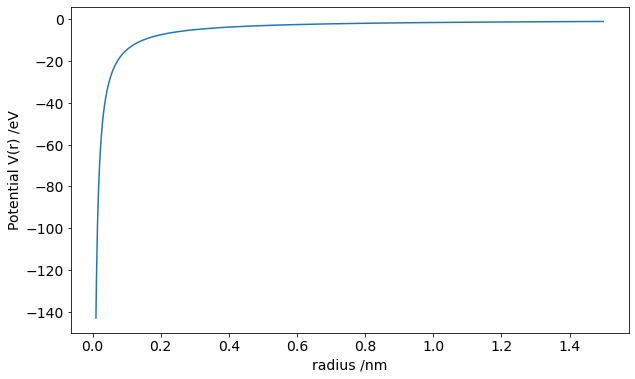

In [29]:
plt.plot(rs,V)
plt.xlabel('radius /nm')
plt.ylabel('Potential V(r) /eV');

## Task 3 - 15 points

Write a function to calculate the first 2 energy levels (eigenvalues of $H$) for $\alpha = 0.01$ and print out the values in eV. The values must be accurate to 0.01 eV. Use the function template `calculate_energy_levels_modified` below for your function. It is fine to call functions you've already written. 

In the cell after, plot the difference $\Delta E$ between the two energy levels as a function of $\alpha$ for $\alpha = 0, 0.01$. Remember to label the axes.

In [30]:
#this is calculate_energy_modified but the checking function from the computer calls it calculate_energy_levels so renamed it
def calculate_energy_levels(N,alpha): 
# YOUR CODE HERE
    r_max = 1.5
    rs = np.linspace(1.5, 0.0, N, endpoint=False)
    #list of potentials using numerical potential function
    V = []
    for r in rs:
        I = potential_numerical(r,alpha)
        V.append(I)
    #diagonalise list into matrix
    V_mtrx = np.diag(V)
    potential_term = V_mtrx

    #use laplace function
    laplace_term =   calculate_laplace(N,rs)
    #calculate energy levels using linalg.eigs()
    H = -c1 * (laplace_term) + potential_term
    eigenvalues, eigenvectors = eigs(H, k=30, which='SM')
    eigenvalues = np.real(np.sort(eigenvalues))
    return eigenvalues[0:2]

In [31]:
E1,E2 = calculate_energy_levels(N_min,alpha)

In [32]:
E1,E2

(-13.801374976294108, -3.534264998824361)

The cell below will test your function against the correct values.

In [33]:
N = 1024
E1, E2 = calculate_energy_levels(N, alpha=0.01)
E1_th, E2_th = -13.807387841665346, -3.5346025272551795
Err1 = abs((E1 - E1_th) / E1_th)
Err2 = abs((E2 - E2_th) / E2_th)
print (f"{Err1 = }, {Err2 = }")
assert Err1 < 5e-4
assert Err2 < 5e-4

Err1 = 0.00016541838666054982, Err2 = 3.5621880451357177e-05


In the cell below, make the plot of $\Delta E$ vs. $\alpha$ as instructed above.

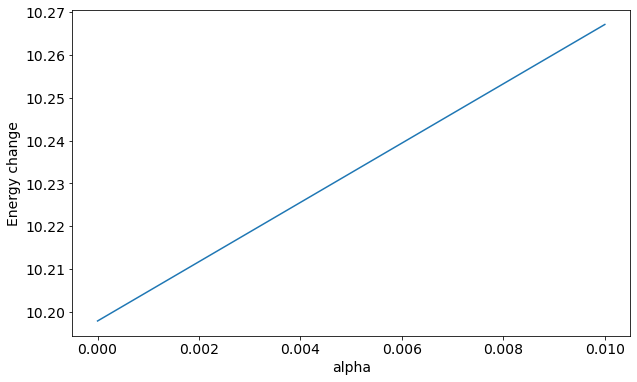

In [34]:
# YOUR CODE HERE
E1,E2 = calculate_energy_levels(N_min,0.01)
#calculate delta E for alpha=0.01
E_del = np.abs(E1-E2)

#calculate delta E for alpha=0
E3,E4 = calculate_energy_levels(N_min,0)
E_del2 = np.abs(E3-E4)
#plot delta E and alpha
dels = [E_del, E_del2]
alphas = [0.01,0]
plt.plot(alphas,dels)
plt.xlabel('alpha')
plt.ylabel('Energy change');

## Task 4 - 20 points

The transition between the 1st and 2nd states is known as the Lyman-$\alpha$ transition. The photon emitted by this transition will have a wavelength, $\lambda$, given by

$
\Large
\begin{align}
\lambda = \frac{hc}{\Delta E}.
\end{align}
$

Imagine the wavelength of this transition has been measured as $\lambda = 121.5 \pm 0.1$ nm. What is the maximum value of $\alpha > 0$ consistent with this measurement (i.e., the largest $\alpha$ such that the predicted and measured wavelengths differ by less than 0.1 nm)?

Using the template `find_alpha_max`, write a function that performs the above calculation and returns the value of $\alpha_{max}$. Your value for $\alpha_{max}$ should be within 1% of the correct answer.

In [35]:
#finding lambda at alpha=0 to initialise it before loop
E1,E2 = calculate_energy_levels(N_min,0)
E_del = np.abs(E1-E2)
wavelength = h*c/(E_del*1.6e-19)
wavelength

1.217437324254777e-07

In [36]:
def find_alpha_max():
    # YOUR CODE HERE
    i = 0
    wavelength = 1.2174373242547493e-07
    alphas = np.linspace(0,1,10000) #small increments of alpha for accuracy
    
    #create a while loop to calculate wavelengths using function, until tolerance is reached
    #take lower limit to give max alpha
    while np.abs(121.4e-9 - wavelength) > 0.1e-9: 
        i += 1
        E1,E2 = calculate_energy_levels(N_min,alphas[i])
        E_del = np.abs(E1-E2)
        wavelength = h*c/(E_del*1.6e-19)
    
    return alphas[i], wavelength

The cell below will run your function. You will not be told the correct answer.

In [37]:
amax = find_alpha_max()
print (f"alpha_max = {amax}.")

alpha_max = (0.0030003000300030005, 1.2149831348037612e-07).


## Task 5 - 10 points

Knowing the shape of the matrix for of $\textbf{H}$, is it possible to greatly increase the accuracy of the energy level calculation without a significant increase in computation time? In the cell below, write a function to compute the first two energy levels using the original (unmodified) potential. Your function should run in 15 seconds or less and compute the first two energy levels each to within an accuracy of $5\times10^{-6}$.

In [38]:
def calculate_energy_levels_super():
    #to increase accuracy, increase N - for an accuracy of 5E-6, value of N is approx = 10050
    N = 10050 
    r = np.linspace(1.5, 0.0, N, endpoint=False)
    laplace_term =   calculate_laplace(N,r)
    potential_term = calculate_potential(r)
     
    H = -c1 * (laplace_term) - potential_term
    #to decrease speed:
    #1. reduce k to only compute 2 eigenvals
    #2. Find eigenvalues near sigma using shift-invert mode
    eigenvalues, eigenvectors = eigs(H, k=2, sigma=-8) 
    eigenvalues = (np.real(np.sort(eigenvalues)))
    
    return eigenvalues[0:2]

In [39]:
t1 = time.time()
my_e1, my_e2 = calculate_energy_levels_super()
t2 = time.time()
print (f"Calculation took {t2-t1} seconds.")

e1_th = -c2 / (2 * r0)
e2_th = e1_th / 4

er1 = abs((my_e1 - e1_th) / e1_th)
er2 = abs((my_e2 - e2_th) / e2_th)
print (f"Err1 = {er1}, Err2 = {er2}.")

Calculation took 0.1886146068572998 seconds.
Err1 = 4.990196878456062e-06, Err2 = 3.6138414946457783e-06.
